In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the diabetes dataset
diabetes_data = pd.read_csv('/content/diabetes_clean_data.csv')

In [3]:
# Setting the seed to 50
np.random.seed(50)

In [4]:
diabetes_sample = diabetes_data.sample(25)

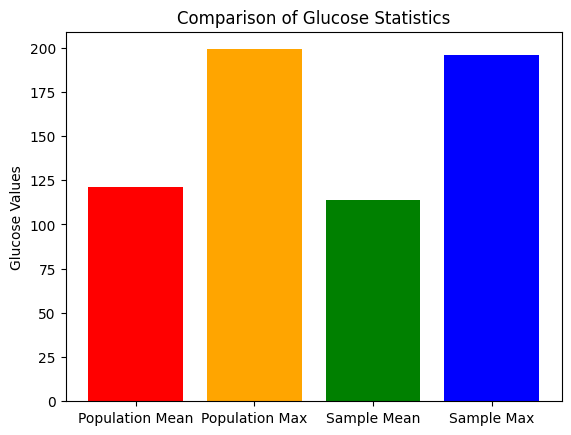

<Figure size 640x480 with 0 Axes>

In [5]:
# Calculating mean and max values for population data
population_mean_glucose = diabetes_data['Glucose'].mean()
population_max_glucose = diabetes_data['Glucose'].max()

# Calculating mean and max values for sample data
sample_mean_glucose = diabetes_sample['Glucose'].mean()
sample_max_glucose = diabetes_sample['Glucose'].max()

# Plotting

labels = ['Population Mean','Population Max','Sample Mean', 'Sample Max']
values = [population_mean_glucose, population_max_glucose, sample_mean_glucose, sample_max_glucose]

plt.bar(labels, values, color=['red', 'orange', 'green', 'blue'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()

#Saving the image
plt.savefig('/content/mean_max_comparison.png')

b)

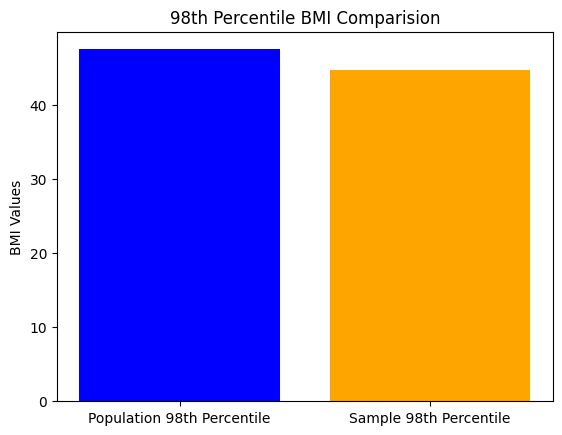

<Figure size 640x480 with 0 Axes>

In [6]:
# Calculating 98th percentile of BMI for population
population_percentile = np.percentile(diabetes_data['BMI'], 98)

# Calculating 98th percentile of BMI for sample
sample_percentile = np.percentile(diabetes_sample['BMI'], 98)

#plotting
labels_percentile = ['Population 98th Percentile', 'Sample 98th Percentile']
values_percentile = [population_percentile, sample_percentile]

plt.bar(labels_percentile, values_percentile, color=['blue', 'orange'])
plt.title('98th Percentile BMI Comparision')
plt.ylabel('BMI Values')
plt.show()

#Saving the image
plt.savefig('/content/percentile_comparison.png')

c)

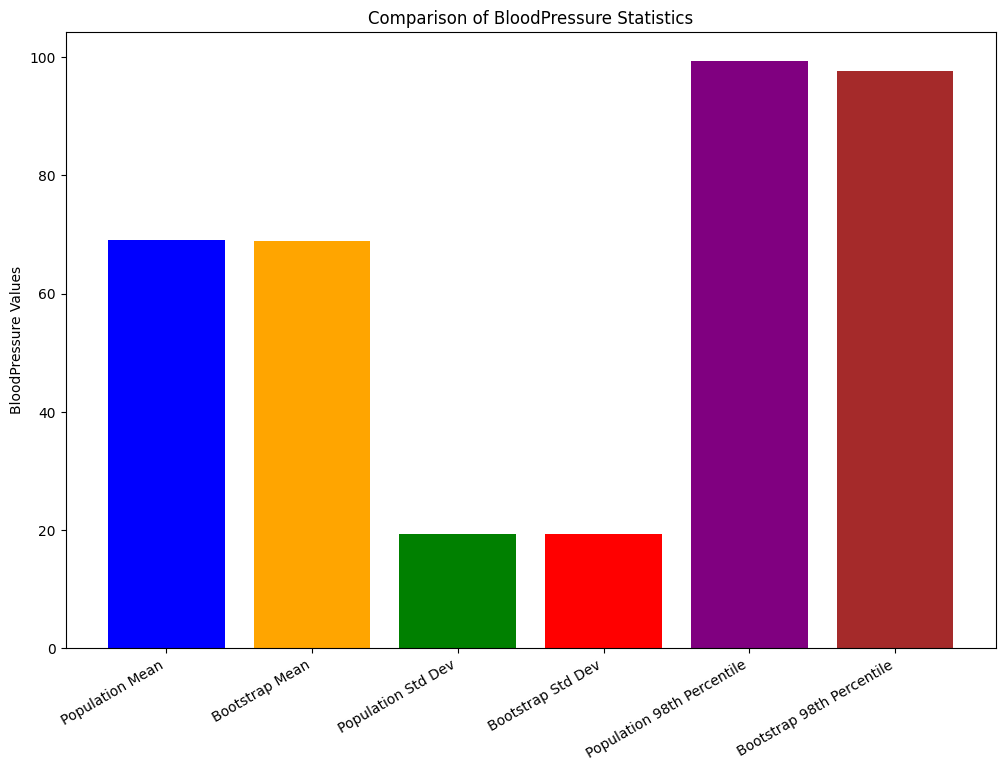

<Figure size 640x480 with 0 Axes>

In [7]:
# Number of bootstrap samples
num_samples = 500

bootstrap_means = []
bootstrap_std_devs = []
bootstrap_percentiles_98 = []

for i in range(num_samples):
    bootstrap_sample = diabetes_data['BloodPressure'].sample(150, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())
    bootstrap_std_devs.append(bootstrap_sample.std())
    bootstrap_percentiles_98.append(np.percentile(bootstrap_sample, 98))

# Calculating population statistics for BloodPressure
population_bloodpressure_mean = diabetes_data['BloodPressure'].mean()
population_bloodpressure_std_dev = diabetes_data['BloodPressure'].std()
population_bloodpressure_percentile = np.percentile(diabetes_data['BloodPressure'], 98)

# Calculating the mean of bootstrap statistics
mean_bootstrap_mean = np.mean(bootstrap_means)
mean_bootstrap_std_dev = np.mean(bootstrap_std_devs)
mean_bootstrap_percentile = np.mean(bootstrap_percentiles_98)

# Plotting
labels_bp = ['Population Mean', 'Bootstrap Mean', 'Population Std Dev', 'Bootstrap Std Dev',
             'Population 98th Percentile', 'Bootstrap 98th Percentile']

values_bp = [population_bloodpressure_mean, mean_bootstrap_mean, population_bloodpressure_std_dev, mean_bootstrap_std_dev,
             population_bloodpressure_percentile, mean_bootstrap_percentile]

plt.figure(figsize=(12, 8))
plt.bar(labels_bp, values_bp, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Comparison of BloodPressure Statistics')
plt.ylabel('BloodPressure Values')
plt.xticks(rotation=30, ha='right')
plt.show()

#Save the chart
plt.savefig('/content/population_bootstrap_comparision.png')